In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Setup path

import os
import sys

# From jupyter notebook, starting from Tensor-Completion/
'''
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
'''

# From google colab
# Add parent packages to path
sys.path.append("/content/drive/My Drive/Tensor-Completion")
sys.path.append("/content/drive/My Drive/Tensor-Completion/Code")

# Add lib directory, containing the required libraries, to path
sys.path.append("/content/drive/My Drive/lib")

In [0]:
try:
  import cupy as cp
except:
  print("cupy not available")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

from Models.TT_WOPT import TT_WOPT_Model
from metrics import RSE
from Utils import mask_img

img shape:  (256, 256, 3)


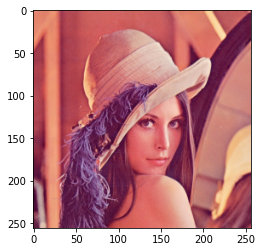

In [4]:
# Read lena image
img_path = '/content/drive/My Drive/Tensor-Completion/Code/data/lena_red.bmp'

img = cv2.imread(img_path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))
plt.imshow(img)
print("img shape: ", img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


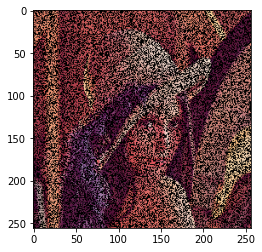

In [5]:
# Mask image
img = cp.asarray(img) # If using cupy

missing_rate=0.5
img_missing = mask_img(img, missing_rate=missing_rate)

#plt.imshow(img_missing) # If using numpy
plt.imshow(cp.asnumpy(img_missing).astype(int)) # If using cupy

In [10]:
# Create and train using gradient descent

model = TT_WOPT_Model(img_missing, (1, 14, 14, 1), 1e-7)
model.train(10000)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch: 5001, Loss: 153.43143654672895
Epoch: 5002, Loss: 153.41504401762845
Epoch: 5003, Loss: 153.39865928127983
Epoch: 5004, Loss: 153.3822823333103
Epoch: 5005, Loss: 153.36591316934937
Epoch: 5006, Loss: 153.3495517850291
Epoch: 5007, Loss: 153.33319817598385
Epoch: 5008, Loss: 153.31685233784933
Epoch: 5009, Loss: 153.30051426626596
Epoch: 5010, Loss: 153.28418395687186
Epoch: 5011, Loss: 153.26786140531476
Epoch: 5012, Loss: 153.25154660723516
Epoch: 5013, Loss: 153.23523955827963
Epoch: 5014, Loss: 153.21894025410197
Epoch: 5015, Loss: 153.20264869035358
Epoch: 5016, Loss: 153.18636486268588
Epoch: 5017, Loss: 153.17008876675632
Epoch: 5018, Loss: 153.15382039822362
Epoch: 5019, Loss: 153.1375597527452
Epoch: 5020, Loss: 153.12130682598945
Epoch: 5021, Loss: 153.10506161361386
Epoch: 5022, Loss: 153.08882411129403
Epoch: 5023, Loss: 153.07259431469356
Epoch: 5024, Loss: 153.05637221948322
Epoch: 5025, 

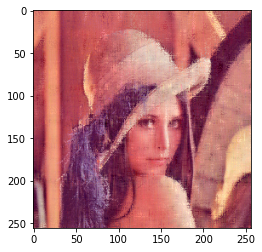

In [11]:
# Reconstruct the image using the trained model

prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(cp.asnumpy(prediction).astype(int))

In [12]:
# Compute the RSE of our prediction

error = RSE(img/255, prediction/255)
print("RSE:", error)

RSE: 0.09757856404881843


In [13]:
# Create and train the model using ncg

model = TT_WOPT_Model(img_missing, (1, 24, 24, 1), lr=None, optimization="ncg")
start = time.time()
model.train(10000)
end = time.time()
print("time: ", end-start)
print("normalized loss: ", model.train_logs)

         Current function value: 4773877.483011
         Iterations: 10000
         Function evaluations: 19091
         Gradient evaluations: 19091
time:  113.05691623687744
normalized loss:  48.562393015655594


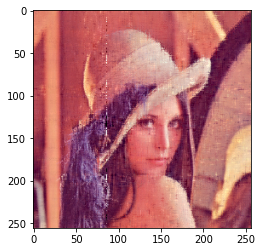

In [14]:
# Reconstruct the image using the trained model

prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(cp.asnumpy(prediction).astype(int))

In [15]:
# Compute the RSE of our prediction

error = RSE(img/255, prediction/255)
print("RSE:", error)

RSE: 0.08928002353784648
